In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def single_replication(wks, lmbda):


    data = pd.DataFrame(columns= ['C', 'U', 'I', 'B', 'R'], data=np.zeros((wks, 5)))

    data.loc[0, 'I'] = lmbda

    #Use Poisson to reverse solve for random vars
    data.loc[:, 'C'] = np.random.poisson(lmbda, size=(wks,1))
    for i in range(1,wks):
        #Note: U_n has been shifted to accommodate the for loop
        data.loc[i, 'I'] = (data.loc[i-1, 'I'] + data.loc[i-1, 'B'] - data.loc[i, 'C'] - data.loc[i-1,'U']) * (data.loc[i-1, 'I'] + data.loc[i-1, 'B'] - data.loc[i, 'C'] - data.loc[i-1,'U'] >= 0)
        data.loc[i, 'U'] = (data.loc[i, 'C'] - data.loc[i, 'I']) * (data.loc[i, 'C'] >= data.loc[i, 'I'])
        data.loc[i, 'R'] = lmbda + data.loc[i,'U']
        data.loc[i, 'B'] = data.loc[i-1, 'R']
    return data


Bad key "text.kerning_factor" on line 4 in
C:\Users\jseme\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution
C:\Users\jseme\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:

#Aggregate data over 100 simulations
reps = 100
weeks = 52
lambda_value = 1046
avg_data = single_replication(weeks, lambda_value)
stderr_data = avg_data.pow(2)
for i in range(reps-1):
    avg_data = avg_data.add(single_replication(weeks, lambda_value))
    stderr_data = stderr_data.add(single_replication(weeks, lambda_value).pow(2))

#Get standard error of data by getting variance and square rooting it (i.e. std dev)
avg_data = avg_data/reps
stderr_data = ((1/(reps-1))*(stderr_data - avg_data.pow(2))).pow(0.5)


avg_data.head()

,C,U,I,B,R
0,1049.54,0.00,1046.00,0.00,0.00
1,1048.53,1036.83,11.70,0.00,2082.83
2,1047.18,1047.18,-0.00,2082.83,2093.18
3,1050.86,1030.70,20.16,2093.18,2076.70
4,1047.03,996.03,51.00,2076.70,2042.03


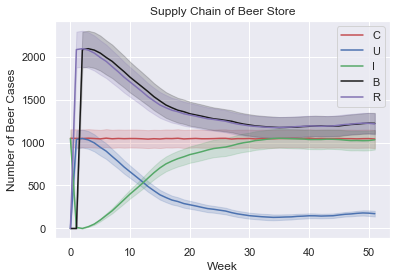

In [3]:

sns.set()

#Fill lines with standard error levels
colors = ['r', 'b', 'g', 'k', 'm']
for idj, j in enumerate(['C', 'U', 'I', 'B', 'R']):
    plt.fill_between(avg_data.index, avg_data.loc[:,j] - stderr_data.loc[:,j]/np.sqrt(reps), avg_data.loc[:,j] + stderr_data.loc[:,j]/np.sqrt(reps), color=colors[idj], alpha=0.2)

plt.plot(avg_data)


#Match the colours with the ones above
for index, line in enumerate(plt.gca().get_lines()):
    line.set_color(colors[index])

#Format plots
plt.gca().legend(('C','U','I','B','R'))
plt.gca().set_title("Supply Chain of Beer Store")
plt.gca().set_xlabel("Week")
plt.gca().set_ylabel("Number of Beer Cases")

plt.savefig('bullwhipeffect_beerstore.png', dpi=800)
plt.show()